# Machine Learning and Time Series Forecasting

## Import Fundamental Libraries

In [1]:
#import fundamental libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Engineer the necessary time features

In [2]:
ecom_df = pd.read_csv('../Data/Brazilian E-Commerce Public Dataset by Olist/ecom.csv')

ecom_df['Year'] = ecom_df['Year'].astype(str)
ecom_df['Month'] = ecom_df['Month'].astype(str)

#Change the column name
ecom_df = ecom_df.rename(columns={'product_category_name_english':'Product'})

ecom_df['order_purchase_date'] = pd.to_datetime(ecom_df['order_purchase_date'])
ecom_df['Week_Number'] = ecom_df['order_purchase_date'].dt.week

# 'Month_Year' (in timed order)
# ecom_df['Month_Year'] = pd.to_datetime(ecom_df['Month_Year'], format='%b-%Y')

# Extract the week and year into new columns
ecom_df["Week_Year"] = ecom_df["order_purchase_date"].dt.strftime('%G-%V')

# Convert the 'Week_Year' column to datetime format
ecom_df['week_starting_date'] = pd.to_datetime(ecom_df['Week_Year'] + '-1', format='%Y-%W-%w')
# Extract the date part (yyyy-mm-dd) from the datetime
ecom_df['week_starting_date'] = ecom_df['week_starting_date'].dt.strftime('%Y-%m-%d')


ecom_df['Revenue'] = ecom_df['Product_Order_Value']+ecom_df['freight_value']
ecom_df

C:\Users\Yomal Sandaruwan\AppData\Local\Temp\ipykernel_16720\1618130365.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  ecom_df['Week_Number'] = ecom_df['order_purchase_date'].dt.week


,ID,neg,neu,pos,compound,order_purchase_date,Product,review_comment_message,payment_type,customer_state,...,product_description_lenght,product_photos_qty,Month_Year,Year,Month,Product_Order_Value,Week_Number,Week_Year,week_starting_date,Revenue
0,1,0.000,0.738,0.262,0.5994,2017-01-05,auto,"I loved the product, matches the images, the d...",boleto,PR,...,1367.0,1.0,Jan-2017,2017,1,10.9,1,2017-01,2017-01-02,19.62
1,2,0.000,0.374,0.626,0.9544,2017-01-05,auto,"Very good seller, arrived well before the dead...",boleto,PR,...,1367.0,1.0,Jan-2017,2017,1,10.9,1,2017-01,2017-01-02,19.62
2,3,0.000,0.631,0.369,0.6249,2017-01-05,baby,"Fast delivery, product with quality and great ...",boleto,PR,...,1183.0,1.0,Jan-2017,2017,1,9.9,1,2017-01,2017-01-02,18.62
3,4,0.000,0.556,0.444,0.8402,2017-01-05,baby,The product was of great quality and the deliv...,boleto,PR,...,1890.0,1.0,Jan-2017,2017,1,11.9,1,2017-01,2017-01-02,20.62
4,5,0.000,0.417,0.583,0.4201,2017-01-05,toys,I highly recommend Targaryen,boleto,PR,...,2136.0,1.0,Jan-2017,2017,1,8.9,1,2017-01,2017-01-02,17.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32213,32214,0.000,0.000,1.000,0.3612,2018-08-29,health_beauty,I recommend,voucher,MG,...,394.0,1.0,Aug-2018,2018,8,45.9,35,2018-35,2018-08-27,61.29
32214,32215,0.000,1.000,0.000,0.0000,2018-08-29,health_beauty,The product arrived faster than expected,credit_card,SP,...,2411.0,1.0,Aug-2018,2018,8,65.0,35,2018-35,2018-08-27,74.21
32215,32216,0.000,1.000,0.000,0.0000,2018-08-29,sports_leisure,"Fast delivery, even before the deadline.",credit_card,SP,...,73.0,3.0,Aug-2018,2018,8,6.9,35,2018-35,2018-08-27,14.29
32216,32217,0.076,0.655,0.269,0.6808,2018-08-29,toys,I found the product very small and where is th...,credit_card,SP,...,711.0,2.0,Aug-2018,2018,8,63.9,35,2018-35,2018-08-27,73.10


In [3]:
ecom_df.columns

Index(['ID', 'neg', 'neu', 'pos', 'compound', 'order_purchase_date', 'Product',
       'review_comment_message', 'payment_type', 'customer_state', 'sales_qty',
       'review_score', 'price', 'freight_value', 'payment_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'Month_Year', 'Year', 'Month',
       'Product_Order_Value', 'Week_Number', 'Week_Year', 'week_starting_date',
       'Revenue'],
      dtype='object')

### Data Overview

#### Weekly View of Sales Revenue Data

In [4]:
#Weekly Sales table
Weekly_revenue_df = ecom_df.groupby(['Year','Month','Month_Year','Week_Number','Week_Year','Product','week_starting_date']).agg({'neg':'sum','neu':'sum','pos':'sum','compound':'sum','sales_qty':'sum','review_score':'sum','price':'sum','freight_value':'sum','product_name_lenght':'mean','product_description_lenght':'mean','product_photos_qty':'mean','Revenue':'sum'})
Weekly_revenue_df = Weekly_revenue_df.sort_values(by=['week_starting_date'],ascending=True)
Weekly_revenue_df = Weekly_revenue_df.reset_index(drop=False)
Weekly_revenue_df

,Year,Month,Month_Year,Week_Number,Week_Year,Product,week_starting_date,neg,neu,pos,compound,sales_qty,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,Revenue
0,2017,1,Jan-2017,1,2017-01,auto,2017-01-02,0.000,1.112,0.888,1.5538,2,10.0,21.80,17.44,52.0,1367.00,1.0,39.24
1,2017,1,Jan-2017,1,2017-01,baby,2017-01-02,0.000,1.187,0.813,1.4651,2,10.0,21.80,17.44,41.0,1536.50,1.0,39.24
2,2017,1,Jan-2017,1,2017-01,bed_bath_table,2017-01-02,0.000,0.654,0.346,0.5719,1,3.0,68.90,15.69,56.0,501.00,3.0,84.59
3,2017,1,Jan-2017,1,2017-01,cool_stuff,2017-01-02,0.000,1.000,0.000,0.0000,2,1.0,798.00,48.52,44.0,422.00,4.0,1644.52
4,2017,1,Jan-2017,1,2017-01,furniture_decor,2017-01-02,0.123,1.877,0.000,-0.1027,3,2.0,294.70,54.91,58.5,343.75,3.0,609.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,2018,8,Aug-2018,35,2018-35,baby,2018-08-27,0.000,1.000,0.000,0.0000,1,1.0,49.99,8.86,33.0,55.00,2.0,58.85
1522,2018,8,Aug-2018,35,2018-35,auto,2018-08-27,0.140,1.183,0.677,0.4118,2,8.0,197.99,23.94,57.0,404.50,2.5,221.93
1523,2018,8,Aug-2018,35,2018-35,toys,2018-08-27,0.284,1.447,0.269,0.2856,2,4.0,89.89,17.54,42.0,452.50,1.5,107.43
1524,2018,8,Aug-2018,35,2018-35,garden_tools,2018-08-27,0.000,1.000,0.000,0.0000,2,1.0,84.00,25.60,55.0,271.00,1.0,193.60


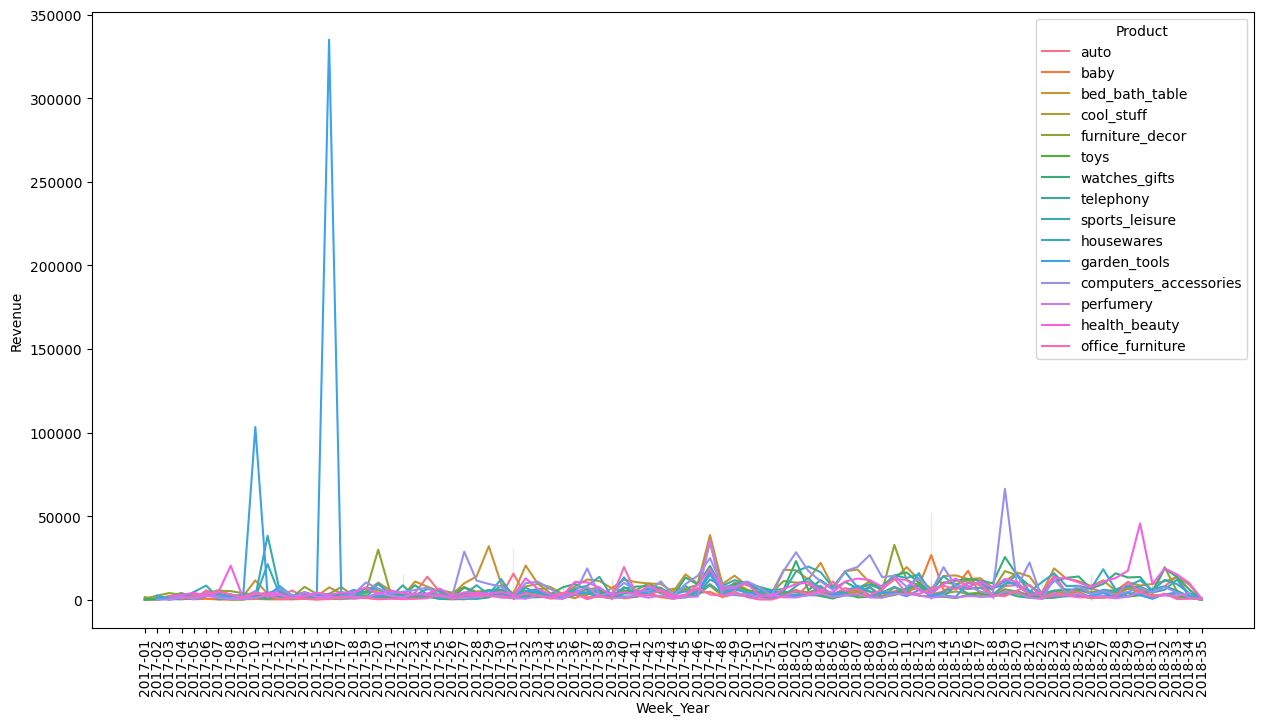

In [5]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data = Weekly_revenue_df, x='Week_Year', y='Revenue',hue='Product')
plt.xticks(rotation = 90)
sns.move_legend(ax,'upper right')
plt.show()

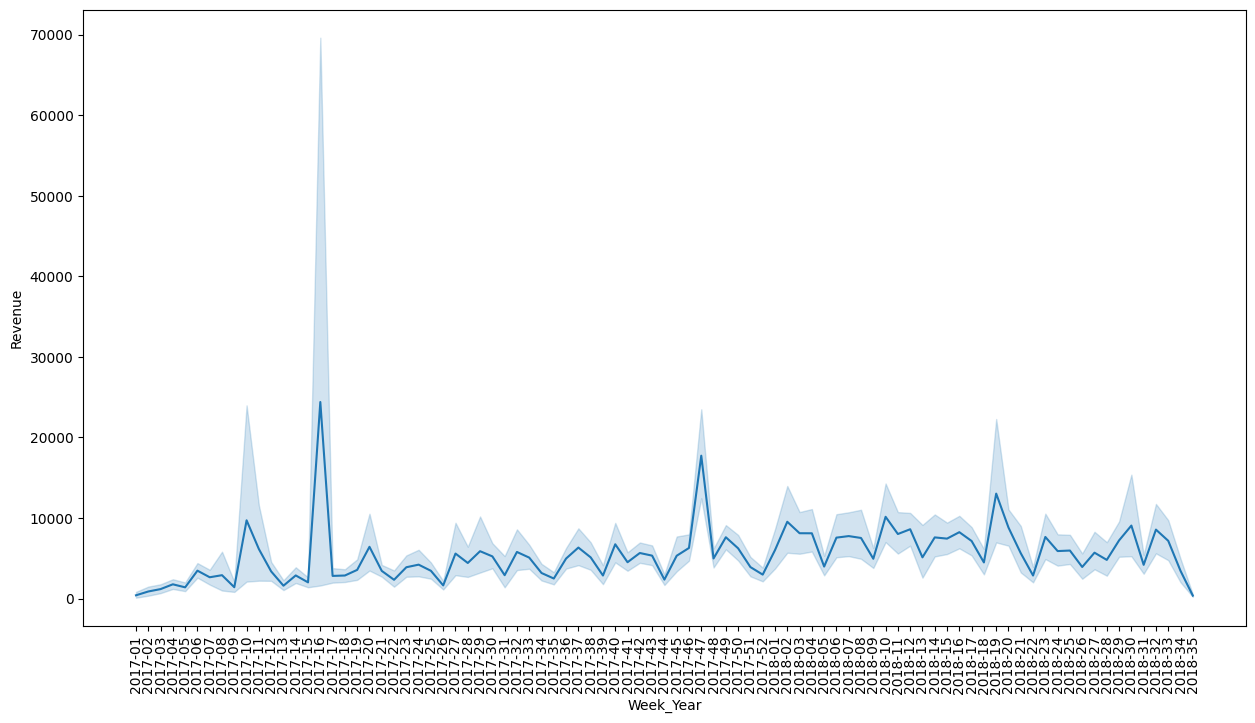

In [6]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data = Weekly_revenue_df, x='Week_Year', y='Revenue')
plt.xticks(rotation = 90)
plt.show()

### Outliar Handling

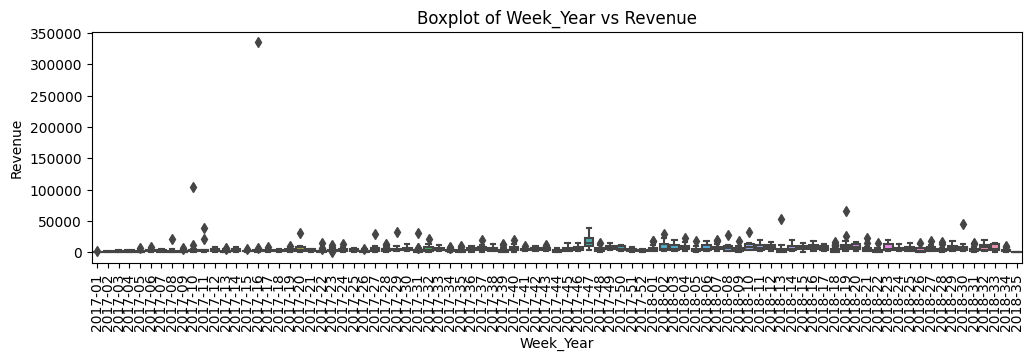

In [7]:
# Select the categorical columns
categorical_cols = [ 'Week_Year']

# Create separate box plots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(12, 3))
    sns.boxplot(data=Weekly_revenue_df, x=col, y='Revenue')
    plt.title(f'Boxplot of {col} vs Revenue')
    plt.xlabel(col)
    plt.xticks(rotation = 90)
    plt.ylabel('Revenue')
    plt.show()

In [8]:
# Select the categorical columns
categorical_cols = ['Week_Year']

# Dictionary to store the count of removed outliers for each category
removed_outliers_count = {}

# Loop through each categorical column
for col in categorical_cols:
    # Get the unique values in the column
    unique_values = Weekly_revenue_df[col].unique()
    
    # Iterate through each unique value
    for value in unique_values:
        # Calculate the IQR for the current category and value
        Q1 = Weekly_revenue_df[(Weekly_revenue_df[col] == value)]['Revenue'].quantile(0.25)
        Q3 = Weekly_revenue_df[(Weekly_revenue_df[col] == value)]['Revenue'].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify and count the outlier rows for the current category and value
        outliers = Weekly_revenue_df[(Weekly_revenue_df[col] == value) & ((Weekly_revenue_df['Revenue'] < lower_bound) | (Weekly_revenue_df['Revenue'] > upper_bound))]
        removed_outliers_count[(col, value)] = outliers.shape[0]

        # Remove the outlier rows for the current category and value
        Weekly_revenue_df = Weekly_revenue_df[~((Weekly_revenue_df[col] == value) & ((Weekly_revenue_df['Revenue'] < lower_bound) | (Weekly_revenue_df['Revenue'] > upper_bound)))]

# Display the number of removed outlier rows for each category and value
for (col, value), count in removed_outliers_count.items():
    print(f"Removed {count} outliers in {col} category for value {value}.")

# Display the final cleaned data frame size
print("Final cleaned data frame size:", Weekly_revenue_df.shape)
Weekly_revenue_df=Weekly_revenue_df


Removed 1 outliers in Week_Year category for value 2017-01.
Removed 0 outliers in Week_Year category for value 2017-02.
Removed 0 outliers in Week_Year category for value 2017-03.
Removed 0 outliers in Week_Year category for value 2017-04.
Removed 1 outliers in Week_Year category for value 2017-05.
Removed 1 outliers in Week_Year category for value 2017-06.
Removed 0 outliers in Week_Year category for value 2017-07.
Removed 1 outliers in Week_Year category for value 2017-08.
Removed 2 outliers in Week_Year category for value 2017-09.
Removed 2 outliers in Week_Year category for value 2017-10.
Removed 2 outliers in Week_Year category for value 2017-11.
Removed 0 outliers in Week_Year category for value 2017-12.
Removed 2 outliers in Week_Year category for value 2017-13.
Removed 0 outliers in Week_Year category for value 2017-14.
Removed 1 outliers in Week_Year category for value 2017-15.
Removed 2 outliers in Week_Year category for value 2017-16.
Removed 1 outliers in Week_Year category

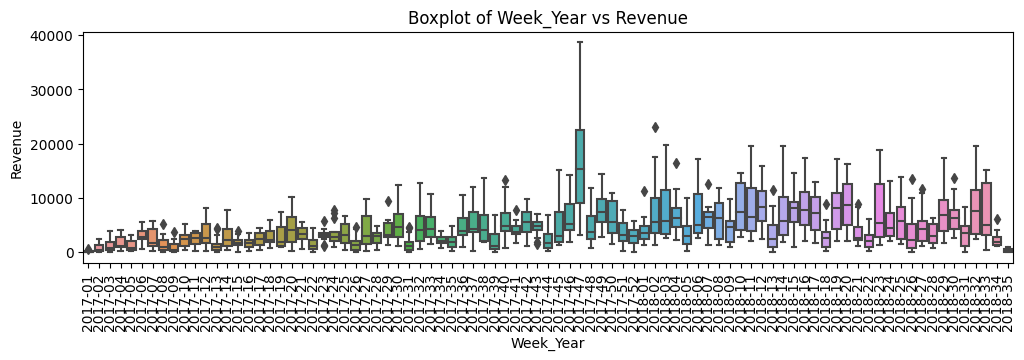

In [9]:
# Create separate box plots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(12, 3))
    sns.boxplot(data=Weekly_revenue_df, x=col, y='Revenue')
    plt.title(f'Boxplot of {col} vs Revenue')
    plt.xlabel(col)
    plt.xticks(rotation = 90)
    plt.ylabel('Revenue')
    plt.show()

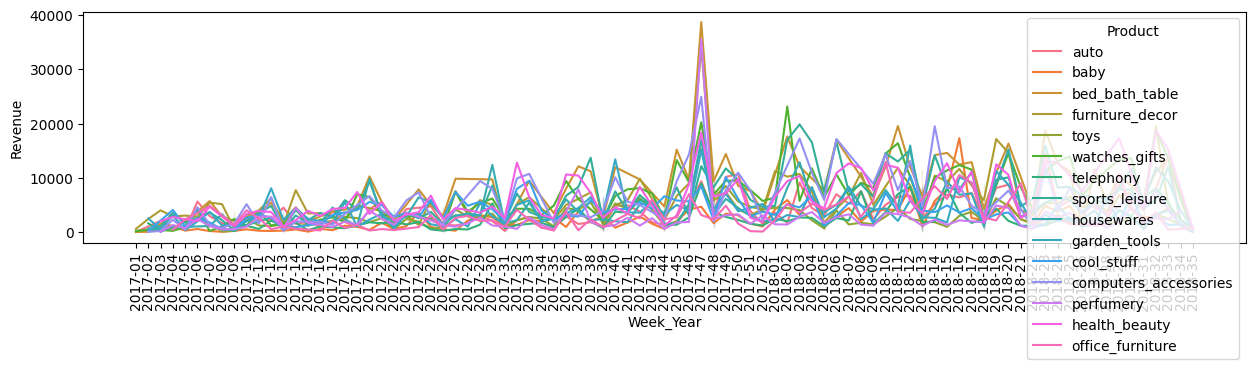

In [10]:
plt.figure(figsize=(15,3))
ax = sns.lineplot(data = Weekly_revenue_df, x='Week_Year', y='Revenue',hue='Product')
plt.xticks(rotation = 90)
sns.move_legend(ax,'upper right')
plt.show()

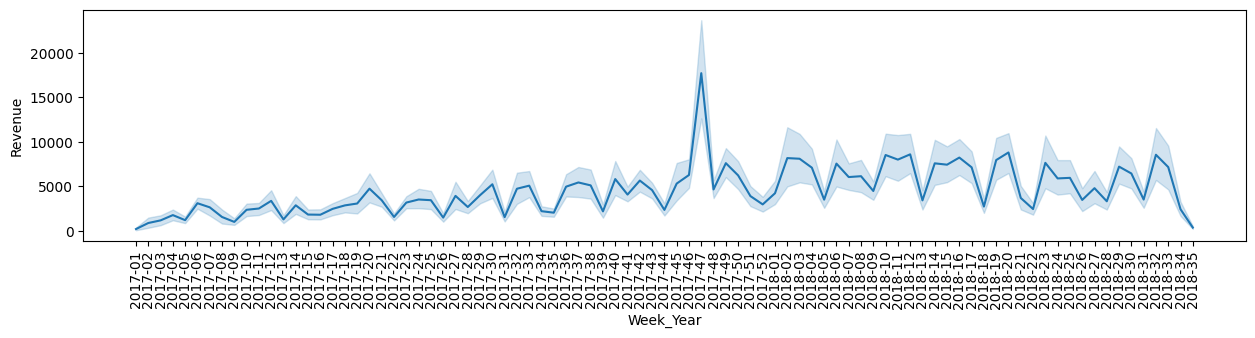

In [11]:
plt.figure(figsize=(15,3))
ax = sns.lineplot(data = Weekly_revenue_df, x='Week_Year', y='Revenue')
plt.xticks(rotation = 90)
plt.show()

# ARIMA Model (Autoregressive Integrated Moving Average)

In [12]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

## Data Formating For ARIMA

The ARIMA model only support the time of the data set and the vriable which is change with the time. Here the sales data already preprocess but they are daily records. Here, the data set has been regrouped as weekly data becasue then the next 24 weeks (6 month) revenue forcast can be easily moniter with sufficiant records.

 Check for Stationarity

In [13]:
ARIMA_revenue_df = Weekly_revenue_df.groupby('week_starting_date').agg({'Revenue':'sum'})
ARIMA_revenue_df.reset_index('week_starting_date',inplace=True)
ARIMA_revenue_df.set_index('week_starting_date',inplace=True)
ARIMA_revenue_df

,Revenue
week_starting_date,
2017-01-02,1180.54
2017-01-09,8761.27
2017-01-16,16420.83
2017-01-23,26498.71
2017-01-30,28781.08
...,...
2018-07-30,98415.86
2018-08-06,128337.29
2018-08-13,107498.47


In [14]:
ARIMA_revenue_df.describe()

,Revenue
count,87.000000
mean,71568.361609
std,40558.125115
min,1180.540000
25%,42937.815000
50%,66369.290000
75%,98920.775000
max,265975.070000


<Figure size 1200x400 with 0 Axes>

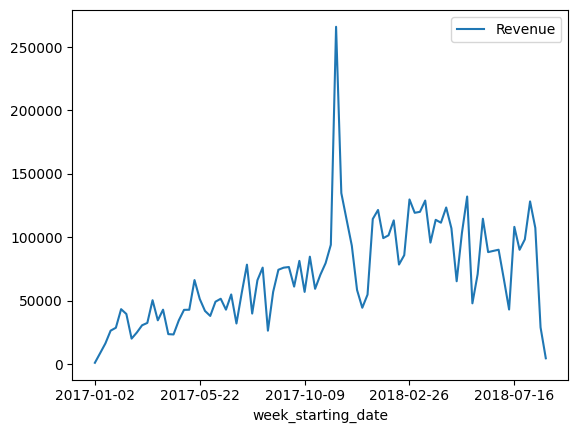

In [15]:
plt.figure(figsize=(12,4)) 
ARIMA_revenue_df.plot()
plt.show()

The above plot shows how the weekly revenue has been distributed along the time period. According to that, during 2017-10-09 and 2018-02-26, the highest revenue has been recorded.

In [16]:
result = adfuller(ARIMA_revenue_df['Revenue'])
result

(-1.7203946244394868,
 0.4206363671953145,
 6,
 80,
 {'1%': -3.5148692050781247, '5%': -2.8984085156250003, '10%': -2.58643890625},
 1747.4711594637627)

In [17]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(revenue):
    result=adfuller(revenue)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [18]:
adfuller_test(ARIMA_revenue_df['Revenue'])

ADF Test Statistic : -1.7203946244394868
p-value : 0.4206363671953145
#Lags Used : 6
Number of Observations Used : 80
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [19]:
ARIMA_revenue_df['Revenue']

week_starting_date
2017-01-02      1180.54
2017-01-09      8761.27
2017-01-16     16420.83
2017-01-23     26498.71
2017-01-30     28781.08
                ...    
2018-07-30     98415.86
2018-08-06    128337.29
2018-08-13    107498.47
2018-08-20     29091.05
2018-08-27      4720.07
Name: Revenue, Length: 87, dtype: float64

The data is not stationary. 

In [20]:
ARIMA_revenue_df['Revenue First Difference'] = ARIMA_revenue_df['Revenue'] - ARIMA_revenue_df['Revenue'].shift(1)

In [21]:
## Again test dickey fuller test
adfuller_test(ARIMA_revenue_df['Revenue First Difference'].dropna())

ADF Test Statistic : -7.3467540176937405
p-value : 1.0308009823875492e-10
#Lags Used : 5
Number of Observations Used : 80
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='week_starting_date'>

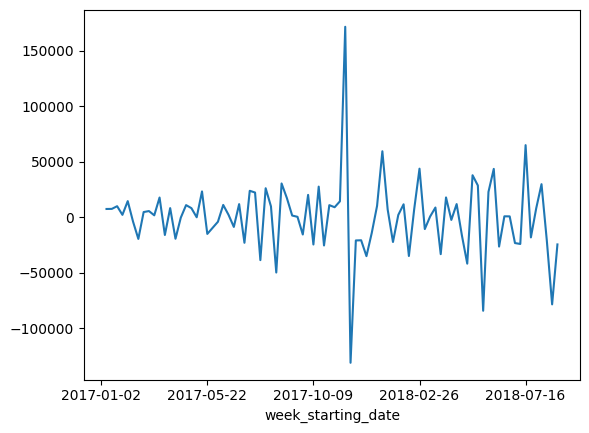

In [22]:
ARIMA_revenue_df['Revenue First Difference'].plot()

In [23]:
ARIMA_revenue_df

,Revenue,Revenue First Difference
week_starting_date,,
2017-01-02,1180.54,NaN
2017-01-09,8761.27,7580.73
2017-01-16,16420.83,7659.56
2017-01-23,26498.71,10077.88
2017-01-30,28781.08,2282.37
...,...,...
2018-07-30,98415.86,8165.27
2018-08-06,128337.29,29921.43
2018-08-13,107498.47,-20838.82


#### Auto Regressive Model

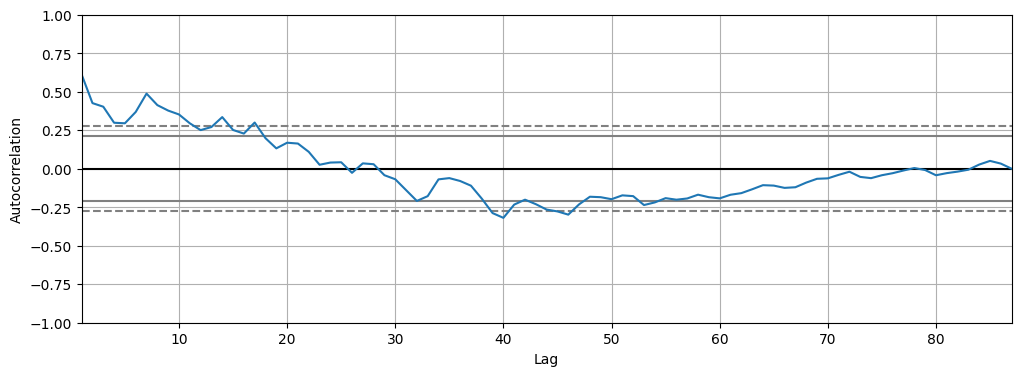

In [24]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize = (12,4))
autocorrelation_plot(ARIMA_revenue_df['Revenue'])
plt.show()

### Auto Correlation and Patial Autocorrelation

1. Identification of an AR model is often best done with the PACF.

- For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

2. Identification of an MA model is often best done with the ACF rather than the PACF.

- For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

- p,d,q 
    - p AR model lags 
    - d differencing 
    - q MA lags

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

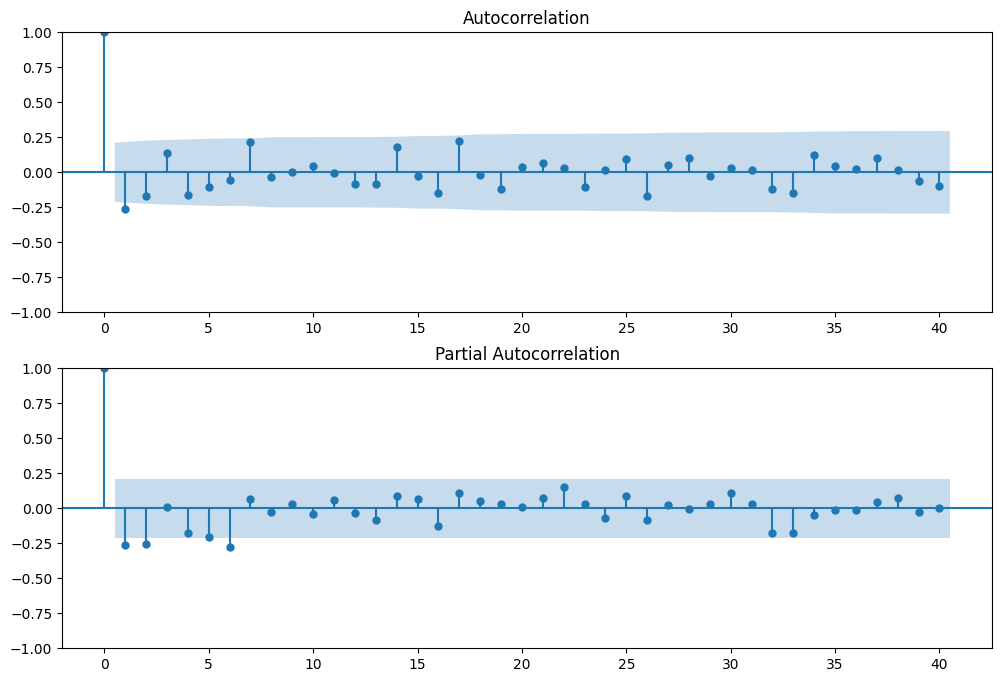

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ARIMA_revenue_df['Revenue First Difference'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ARIMA_revenue_df['Revenue First Difference'].iloc[1:],lags=40,ax=ax2)

In [27]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
model=ARIMA(ARIMA_revenue_df['Revenue'],order=(1,1,1))
model_fit=model.fit()

c:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                   87
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1010.118
Date:                Sat, 18 Nov 2023   AIC                           2026.237
Time:                        20:20:47   BIC                           2033.600
Sample:                    01-02-2017   HQIC                          2029.200
                         - 08-27-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3409      0.186      1.837      0.066      -0.023       0.705
ma.L1         -0.8593      0.113     -7.615      0.000      -1.080      -0.638
sigma2      1.093e+09   9.45e-11   1.16e+19      0.000    1.09e+09    1.09e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               792.90
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               5.27   Skew:                             2.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.06e+34. Standard errors may be unstable.
"""

In [33]:
ARIMA_revenue_df['forecast']=model_fit.predict(start=50,end=87,dynamic=False)

<Axes: xlabel='week_starting_date'>

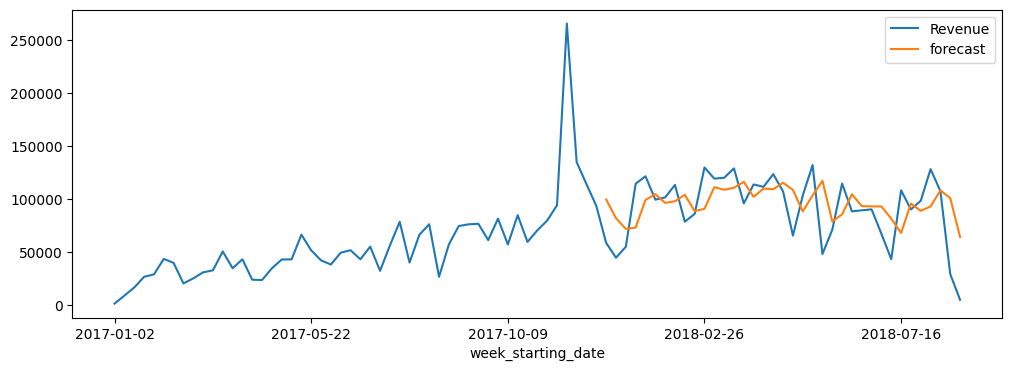

In [34]:
ARIMA_revenue_df[['Revenue','forecast']].plot(figsize=(12,4))

#### Future Forecast

In [ ]:
ARIMA_revenue_df.reset_index('week_starting_date',inplace=True)
ARIMA_revenue_df['week_starting_date'] = pd.to_datetime(ARIMA_revenue_df['week_starting_date'])
ARIMA_revenue_df.set_index('week_starting_date',inplace=True)
ARIMA_revenue_df

,Revenue,Revenue First Difference,forecast
week_starting_date,,,
2017-01-02,1180.54,NaN,NaN
2017-01-09,8761.27,7580.73,NaN
2017-01-16,16420.83,7659.56,NaN
2017-01-23,26498.71,10077.88,NaN
2017-01-30,28781.08,2282.37,NaN
...,...,...,...
2018-07-30,98415.86,8165.27,88872.893728
2018-08-06,128337.29,29921.43,92999.258230
2018-08-13,107498.47,-20838.82,108171.998714


In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[ARIMA_revenue_df.index[-1]+ DateOffset(weeks=x)for x in range(0,11)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=ARIMA_revenue_df.columns)

In [ ]:
future_df=pd.concat([ARIMA_revenue_df,future_datest_df])
future_df.tail(40)

,Revenue,Revenue First Difference,forecast
2018-02-05,113407.43,11791.78,97913.136320
2018-02-12,78599.63,-34807.80,104113.152866
2018-02-19,85994.87,7395.24,88656.570427
2018-02-26,129899.47,43904.60,90803.448392
2018-03-05,119373.40,-10526.07,111272.271945
2018-03-12,120142.05,768.65,108823.190758
2018-03-19,129027.40,8885.35,110677.591357
2018-03-26,95883.65,-33143.75,116288.406368
2018-04-02,113848.59,17964.94,102117.865198
2018-04-09,111570.37,-2278.22,109893.093941


In [ ]:
future_df['forecast'] = model_fit.predict(start = 50, end = 111, dynamic= False)  
future_df.tail(25)

,Revenue,Revenue First Difference,forecast
2018-05-21,48034.13,-84169.43,117300.568230
2018-05-28,70989.45,22955.32,78859.515622
2018-06-04,114689.70,43700.25,85578.719455
2018-06-11,88393.28,-26296.42,104573.175889
2018-06-18,89361.52,968.24,93331.510575
2018-06-25,90271.51,909.99,93103.122899
2018-07-02,67128.18,-23143.33,93015.022561
2018-07-09,43163.60,-23964.58,81482.794946
2018-07-16,108287.83,65124.23,67921.587065
2018-07-23,90250.59,-18037.24,95803.705989


<Axes: >

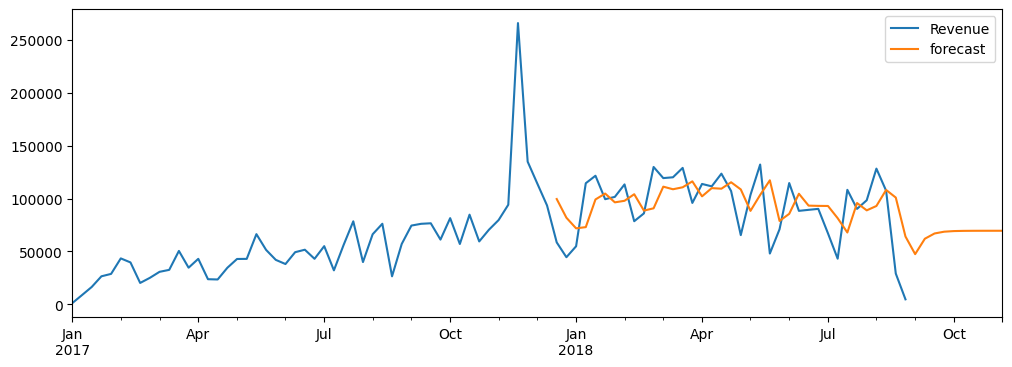

In [ ]:
future_df[['Revenue', 'forecast']].plot(figsize=(12, 4)) 

# ML Approach with Weekly Revenue Data

## Model Development

In [ ]:
from sklearn.preprocessing import StandardScaler #standardscaling
from sklearn.model_selection import train_test_split ,cross_validate
from sklearn.decomposition import PCA #principle component analysis
from sklearn.metrics import mean_squared_error as mse,r2_score,SCORERS #mean squre error

#ML Models
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


#Validation
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold #K Fold Cross Validation
from sklearn.model_selection import cross_val_score

In [ ]:
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
def rmse(actual, pred):
    return np.sqrt(((actual - pred) ** 2).mean())

### Feature Selection and Encoding

In [ ]:
ml_model_weekly_df = Weekly_revenue_df.groupby(['Year','Month','Month_Year','Week_Number','Week_Year','week_starting_date']).agg({'neg':'sum','neu':'sum','pos':'sum','compound':'sum','sales_qty':'sum','review_score':'sum','price':'sum','freight_value':'sum','product_name_lenght':'mean','product_description_lenght':'mean','product_photos_qty':'mean','Revenue':'sum'})
ml_model_weekly_df = ml_model_weekly_df.reset_index(drop=False)
ml_model_weekly_df = ml_model_weekly_df.sort_values(by=['week_starting_date'],ascending=True)
ml_model_weekly_df

,Year,Month,Month_Year,Week_Number,Week_Year,week_starting_date,neg,neu,pos,compound,sales_qty,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,Revenue
0,2017,1,Jan-2017,1,2017-01,2017-01-02,0.246,6.890,3.864,5.5572,12,44.0,759.99,160.75,49.861111,949.319444,1.888889,1180.54
1,2017,1,Jan-2017,2,2017-02,2017-01-09,1.503,20.269,11.228,9.6147,42,117.0,6737.65,919.04,54.209091,1253.703788,3.026515,8761.27
2,2017,1,Jan-2017,3,2017-03,2017-01-16,1.917,47.324,21.761,18.9762,91,267.0,10262.77,1595.77,44.089671,837.162676,2.094932,16420.83
3,2017,1,Jan-2017,4,2017-04,2017-01-23,5.470,90.457,32.072,26.0117,155,454.0,19519.05,3123.62,45.725676,902.706000,2.206758,26498.71
21,2017,2,Feb-2017,5,2017-05,2017-01-30,3.633,65.237,24.131,27.9252,105,352.0,12856.39,2228.56,49.343288,947.541606,2.365023,17304.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2018,8,Aug-2018,31,2018-31,2018-07-30,15.021,220.407,90.577,85.6494,370,1191.0,42305.17,7863.94,48.304070,915.895690,2.578769,59731.06
100,2018,8,Aug-2018,32,2018-32,2018-08-06,19.043,388.397,178.559,161.2046,678,2226.0,89964.55,16231.42,48.898408,868.986029,2.166673,128337.29
101,2018,8,Aug-2018,33,2018-33,2018-08-13,15.081,345.970,158.949,161.8809,589,2097.0,81852.25,12082.31,49.014601,858.239206,2.634811,107498.47
102,2018,8,Aug-2018,34,2018-34,2018-08-20,8.876,135.390,70.728,69.4825,247,864.0,20538.81,4003.58,49.731790,830.844286,2.526621,29091.05


In [ ]:
num_features=ml_model_weekly_df.drop(columns=['Year','Month','Month_Year','Revenue','Week_Year','week_starting_date'])
num_features

,Week_Number,neg,neu,pos,compound,sales_qty,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty
0,1,0.246,6.890,3.864,5.5572,12,44.0,759.99,160.75,49.861111,949.319444,1.888889
1,2,1.503,20.269,11.228,9.6147,42,117.0,6737.65,919.04,54.209091,1253.703788,3.026515
2,3,1.917,47.324,21.761,18.9762,91,267.0,10262.77,1595.77,44.089671,837.162676,2.094932
3,4,5.470,90.457,32.072,26.0117,155,454.0,19519.05,3123.62,45.725676,902.706000,2.206758
21,5,3.633,65.237,24.131,27.9252,105,352.0,12856.39,2228.56,49.343288,947.541606,2.365023
...,...,...,...,...,...,...,...,...,...,...,...,...
99,31,15.021,220.407,90.577,85.6494,370,1191.0,42305.17,7863.94,48.304070,915.895690,2.578769
100,32,19.043,388.397,178.559,161.2046,678,2226.0,89964.55,16231.42,48.898408,868.986029,2.166673
101,33,15.081,345.970,158.949,161.8809,589,2097.0,81852.25,12082.31,49.014601,858.239206,2.634811
102,34,8.876,135.390,70.728,69.4825,247,864.0,20538.81,4003.58,49.731790,830.844286,2.526621


C:\Users\Yomal Sandaruwan\AppData\Local\Temp\ipykernel_8580\2901136837.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ml_model_weekly_df.corr(),annot=True,fmt='.2f')


<Axes: >

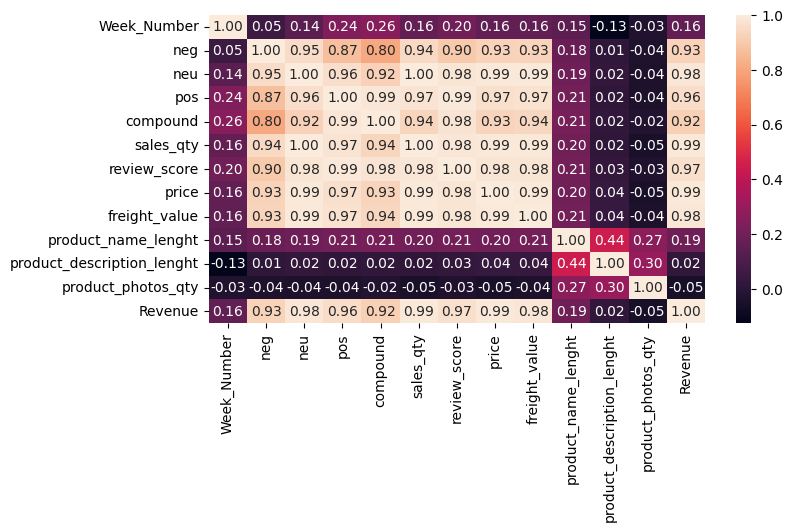

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(ml_model_weekly_df.corr(),annot=True,fmt='.2f')

In [ ]:
ml_model_weekly_df.corr()

C:\Users\Yomal Sandaruwan\AppData\Local\Temp\ipykernel_8580\810235870.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ml_model_weekly_df.corr()


,Week_Number,neg,neu,pos,compound,sales_qty,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,Revenue
Week_Number,1.000000,0.054237,0.140609,0.238260,0.259688,0.163520,0.202873,0.159568,0.159003,0.146848,-0.125478,-0.025483,0.155922
neg,0.054237,1.000000,0.954215,0.871365,0.804522,0.944288,0.899625,0.929579,0.930994,0.179543,0.011002,-0.035800,0.929099
neu,0.140609,0.954215,1.000000,0.960995,0.921363,0.996122,0.978339,0.987446,0.987388,0.193259,0.024954,-0.040812,0.982851
pos,0.238260,0.871365,0.960995,1.000000,0.986497,0.973702,0.993945,0.967250,0.969412,0.207320,0.018412,-0.040107,0.957411
compound,0.259688,0.804522,0.921363,0.986497,1.000000,0.937690,0.976942,0.933602,0.938582,0.214704,0.023735,-0.024055,0.919308
sales_qty,0.163520,0.944288,0.996122,0.973702,0.937690,1.000000,0.984578,0.987413,0.989721,0.195671,0.018041,-0.046440,0.988876
review_score,0.202873,0.899625,0.978339,0.993945,0.976942,0.984578,1.000000,0.979447,0.981228,0.206682,0.028385,-0.029272,0.967462
price,0.159568,0.929579,0.987446,0.967250,0.933602,0.987413,0.979447,1.000000,0.988338,0.196173,0.035568,-0.048591,0.990250
freight_value,0.159003,0.930994,0.987388,0.969412,0.938582,0.989721,0.981228,0.988338,1.000000,0.205106,0.041191,-0.041100,0.983554
product_name_lenght,0.146848,0.179543,0.193259,0.207320,0.214704,0.195671,0.206682,0.196173,0.205106,1.000000,0.442238,0.270524,0.188753


In [ ]:
y = ml_model_weekly_df.Revenue
y.reset_index()

,index,Revenue
0,0,1180.54
1,1,8761.27
2,2,16420.83
3,3,26498.71
4,21,17304.80
...,...,...
99,99,59731.06
100,100,128337.29
101,101,107498.47
102,102,29091.05


In [ ]:
from scipy.stats import pearsonr

# Hypothesis testing
def hypothesis_test(target_varible,dependant_varible):
    Hypothesis_test = pearsonr(target_varible,dependant_varible)
    return Hypothesis_test

n=0
test_column = num_features.columns.tolist()
for col in test_column:
    h = hypothesis_test(y,num_features[col])
    n=n+1
    print('Hypothesis',n,'Test Result:', 'Revenue vs',col, h)


Hypothesis 1 Test Result: Revenue vs Week_Number PearsonRResult(statistic=0.1559223838338721, pvalue=0.113976942912004)
Hypothesis 2 Test Result: Revenue vs neg PearsonRResult(statistic=0.9290986419538911, pvalue=7.316661189131019e-46)
Hypothesis 3 Test Result: Revenue vs neu PearsonRResult(statistic=0.9828508393327862, pvalue=1.0282996895315918e-76)
Hypothesis 4 Test Result: Revenue vs pos PearsonRResult(statistic=0.9574111307812472, pvalue=7.673339356159829e-57)
Hypothesis 5 Test Result: Revenue vs compound PearsonRResult(statistic=0.9193078577482902, pvalue=4.179485421269655e-43)
Hypothesis 6 Test Result: Revenue vs sales_qty PearsonRResult(statistic=0.988875773247132, pvalue=3.0909457873777533e-86)
Hypothesis 7 Test Result: Revenue vs review_score PearsonRResult(statistic=0.9674615423643765, pvalue=1.0767642781606982e-62)
Hypothesis 8 Test Result: Revenue vs price PearsonRResult(statistic=0.9902499703949451, pvalue=3.840074901547868e-89)
Hypothesis 9 Test Result: Revenue vs freight

### Identify the relationship of Target Variable and Categorical Variables - ANOVA TEST

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
H13 = ols('Revenue ~ C(Year)',data = Weekly_revenue_df).fit()
sm.stats.anova_lm(H13,typ=2) #H13th Hypothesis

In [ ]:
H14 = ols('Revenue ~ C(Month)',data = Weekly_revenue_df).fit()
sm.stats.anova_lm(H14,typ=2) #H14th Hypothesis

### Catergorical Feature Handling

In [ ]:
cat_features = ml_model_weekly_df[['Year', 'Month','Week_Number']]

In [ ]:
cat_features = pd.get_dummies(cat_features)
cat_features.shape

(104, 15)

In [ ]:
pca = PCA(n_components=5)
pca.fit(cat_features)
pca_transformed=pca.transform(cat_features)

#PCA Data into Data frame
pca_df=pd.DataFrame(pca_transformed)
pca_df

,0,1,2,3,4
0,-22.108683,-0.948164,0.104981,-0.154805,0.051040
1,-21.109001,-0.933330,0.103216,-0.154901,0.051040
2,-20.109319,-0.918495,0.101451,-0.154997,0.051040
3,-19.109637,-0.903661,0.099686,-0.155093,0.051040
4,-18.107923,-0.872405,0.052077,-0.159934,0.620612
...,...,...,...,...,...
99,7.874935,1.018300,-0.333968,-0.223765,0.410672
100,8.874618,1.033134,-0.335733,-0.223862,0.410672
101,9.874300,1.047968,-0.337498,-0.223958,0.410672
102,10.873982,1.062803,-0.339263,-0.224054,0.410672


In [ ]:
#Concatinate the PCA Feature and Numerical Features and create new data frame as independant varible
x=pd.concat([num_features.reset_index(drop=True),pca_df.reset_index(drop=True)],axis=1)
x

,Week_Number,neg,neu,pos,compound,sales_qty,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,0,1,2,3,4
0,1,0.246,6.890,3.864,5.5572,12,44.0,759.99,160.75,49.861111,949.319444,1.888889,-22.108683,-0.948164,0.104981,-0.154805,0.051040
1,2,1.503,20.269,11.228,9.6147,42,117.0,6737.65,919.04,54.209091,1253.703788,3.026515,-21.109001,-0.933330,0.103216,-0.154901,0.051040
2,3,1.917,47.324,21.761,18.9762,91,267.0,10262.77,1595.77,44.089671,837.162676,2.094932,-20.109319,-0.918495,0.101451,-0.154997,0.051040
3,4,5.470,90.457,32.072,26.0117,155,454.0,19519.05,3123.62,45.725676,902.706000,2.206758,-19.109637,-0.903661,0.099686,-0.155093,0.051040
4,5,3.633,65.237,24.131,27.9252,105,352.0,12856.39,2228.56,49.343288,947.541606,2.365023,-18.107923,-0.872405,0.052077,-0.159934,0.620612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,31,15.021,220.407,90.577,85.6494,370,1191.0,42305.17,7863.94,48.304070,915.895690,2.578769,7.874935,1.018300,-0.333968,-0.223765,0.410672
100,32,19.043,388.397,178.559,161.2046,678,2226.0,89964.55,16231.42,48.898408,868.986029,2.166673,8.874618,1.033134,-0.335733,-0.223862,0.410672
101,33,15.081,345.970,158.949,161.8809,589,2097.0,81852.25,12082.31,49.014601,858.239206,2.634811,9.874300,1.047968,-0.337498,-0.223958,0.410672
102,34,8.876,135.390,70.728,69.4825,247,864.0,20538.81,4003.58,49.731790,830.844286,2.526621,10.873982,1.062803,-0.339263,-0.224054,0.410672


In [ ]:
x.shape

(104, 17)

In [ ]:
y.shape

(104,)

In [ ]:
np.random.seed(42)
X1_train, X1_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
#Scale the varibales according to standard normal distribution
scaler=StandardScaler()
X1_train.columns = X1_train.columns.astype(str)
X1_test.columns = X1_test.columns.astype(str)

x_train =scaler.fit_transform(X1_train)
x_test =scaler.transform(X1_test)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

LinearRegression_model = LinearRegression().fit(x_train,y_train)
y_pred= LinearRegression_model.predict(x_test)


In [ ]:
y_pred

In [ ]:
print('Model Score : ',r2_score(y_test, y_pred))
print('Mean Squred Error : ',mse(y_test,y_pred))
print('Root Mean Squred Error : ',rmse(y_test,y_pred)) 
print('Mean Absolute Error : ',mean_absolute_error(y_test,y_pred))
print('Mean Absolute Percentage Error : ', mape(y_test,y_pred))

Model Score :  0.995665113995745
Mean Squred Error :  5605341.023002787
Root Mean Squred Error :  2367.5601413697577
Mean Absolute Error :  1933.1298618294186
Mean Absolute Percentage Error :  19.13347075596874


<Axes: xlabel='Revenue', ylabel='Count'>

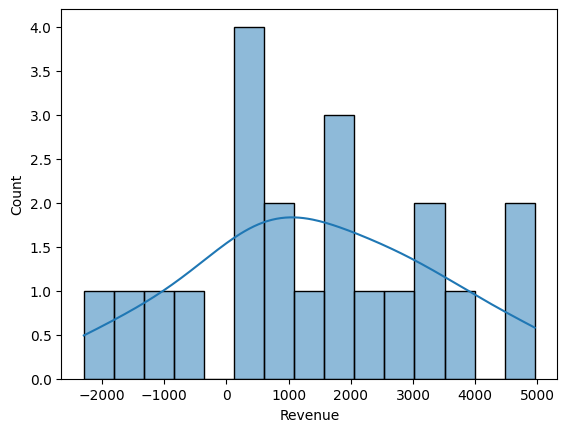

In [ ]:
sns.histplot(x = y_test - y_pred,data =ml_model_weekly_df, bins =15, kde = True)

### Decission Tree

In [ ]:
DecissionTree_model = DecisionTreeRegressor()
DecissionTree_model.fit(x_train,y_train)
y_pred= DecissionTree_model.predict(x_test)

In [ ]:
print('Model Score : ',r2_score(y_test, y_pred))
print('Mean Squred Error : ',mse(y_test,y_pred))
print('Root Mean Squred Error : ',rmse(y_test,y_pred)) 
print('Mean Absolute Error : ',mean_absolute_error(y_test,y_pred))
print('Mean Absolute Percentage Error : ', mape(y_test,y_pred))

Model Score :  0.9584784082196025
Mean Squred Error :  53690611.82199051
Root Mean Squred Error :  7327.387789791837
Mean Absolute Error :  5420.0209523809535
Mean Absolute Percentage Error :  35.85936285258623


<Axes: xlabel='Revenue', ylabel='Count'>

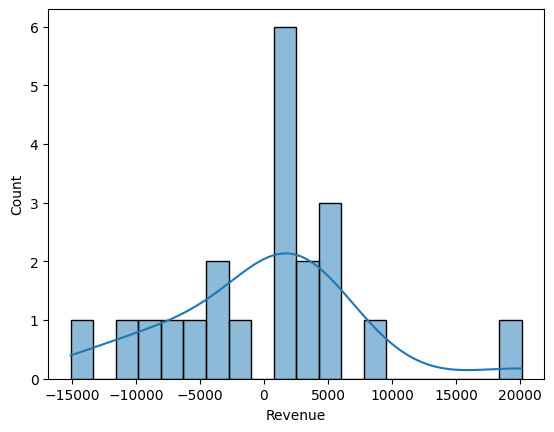

In [ ]:
sns.histplot(x = y_test - y_pred,data =ml_model_weekly_df, bins =20, kde = True)

### Random Forest

In [ ]:
RandomForest_model = RandomForestRegressor()
RandomForest_model.fit(x_train,y_train)
y_pred= RandomForest_model.predict(x_test)

In [ ]:
print('Model Score : ',r2_score(y_test, y_pred))
print('Mean Squred Error : ',mse(y_test,y_pred))
print('Root Mean Squred Error : ',rmse(y_test,y_pred)) 
print('Mean Absolute Error : ',mean_absolute_error(y_test,y_pred))
print('Mean Absolute Percentage Error : ', mape(y_test,y_pred))

Model Score :  0.9813022818419933
Mean Squred Error :  24177587.72081719
Root Mean Squred Error :  4917.0710510238905
Mean Absolute Error :  3698.8561333333264
Mean Absolute Percentage Error :  37.29608713568658


<Axes: xlabel='Revenue', ylabel='Count'>

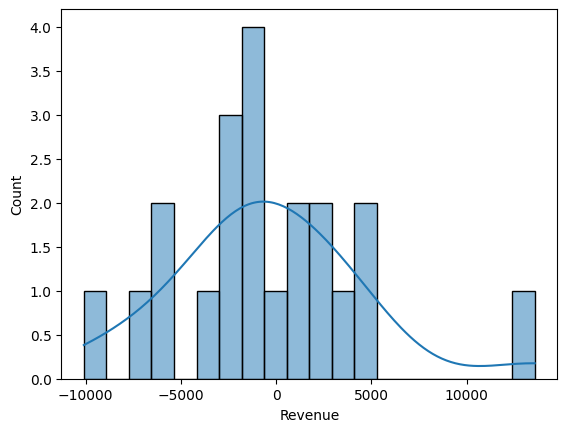

In [ ]:
sns.histplot(x = y_test - y_pred,data =ml_model_weekly_df, bins =20, kde = True)

### Gradiant Boost

In [ ]:
XGBOOST_model = XGBRegressor()
print(XGBOOST_model)
XGBOOST_model.fit(x_train,y_train)
y_pred= XGBOOST_model.predict(x_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [ ]:
print('Model Score : ',r2_score(y_test, y_pred))
print('Mean Squred Error : ',mse(y_test,y_pred))
print('Root Mean Squred Error : ',rmse(y_test,y_pred)) 
print('Mean Absolute Error : ',mean_absolute_error(y_test,y_pred))
print('Mean Absolute Percentage Error : ', mape(y_test,y_pred))

Model Score :  0.9858783614424125
Mean Squred Error :  18260364.826471683
Root Mean Squred Error :  4273.214811646108
Mean Absolute Error :  3479.122531622025
Mean Absolute Percentage Error :  22.774042700550964


<Axes: xlabel='Revenue', ylabel='Count'>

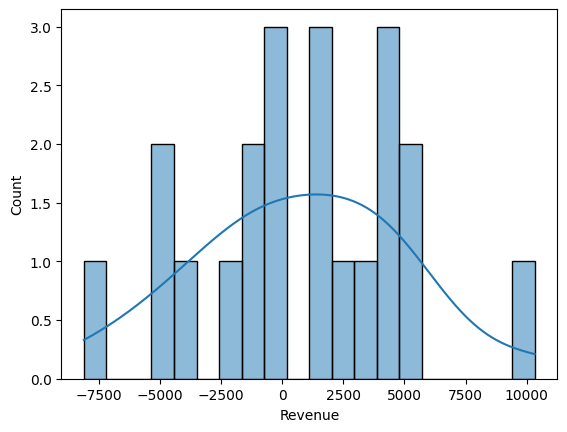

In [ ]:
sns.histplot(x = y_test - y_pred,data =ml_model_weekly_df, bins =20, kde = True)

### ADA Boost

In [ ]:
DessicisionTree_estimator = DecisionTreeRegressor( max_depth = 1, random_state=0)
ADABOOST_model = AdaBoostRegressor(base_estimator = DessicisionTree_estimator, n_estimators = 50,learning_rate =1)
print(ADABOOST_model)
ADABOOST_model.fit(x_train,y_train)
y_pred= ADABOOST_model.predict(x_test)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1,
                                                       random_state=0),
                  learning_rate=1)


c:\python\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
print('Model Score : ',r2_score(y_test, y_pred))
print('Mean Squred Error : ',mse(y_test,y_pred))
print('Root Mean Squred Error : ',rmse(y_test,y_pred)) 
print('Mean Absolute Error : ',mean_absolute_error(y_test,y_pred))
print('Mean Absolute Percentage Error : ', mape(y_test,y_pred))

Model Score :  0.6278035402541208
Mean Squred Error :  481278650.0918641
Root Mean Squred Error :  21938.063954958834
Mean Absolute Error :  18427.23011037979
Mean Absolute Percentage Error :  249.64068157122435


<Axes: xlabel='Revenue', ylabel='Count'>

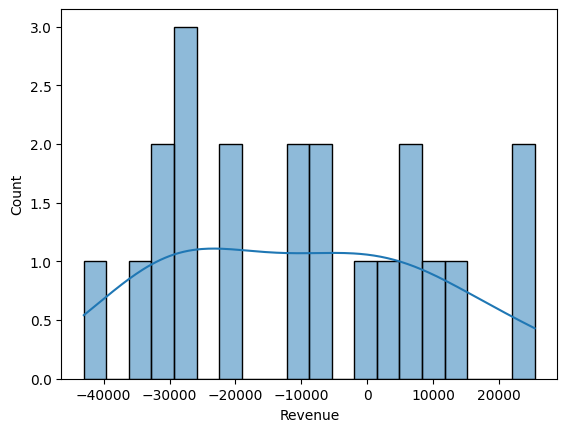

In [ ]:
sns.histplot(x = y_test - y_pred,data =ml_model_weekly_df, bins =20, kde = True)